# Lab 2


## Read and explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure

In [2]:
cali_df = pd.read_csv('ST83446_california_housing.csv')


In [3]:
cali_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [5]:
cali_df.shape

(300, 7)

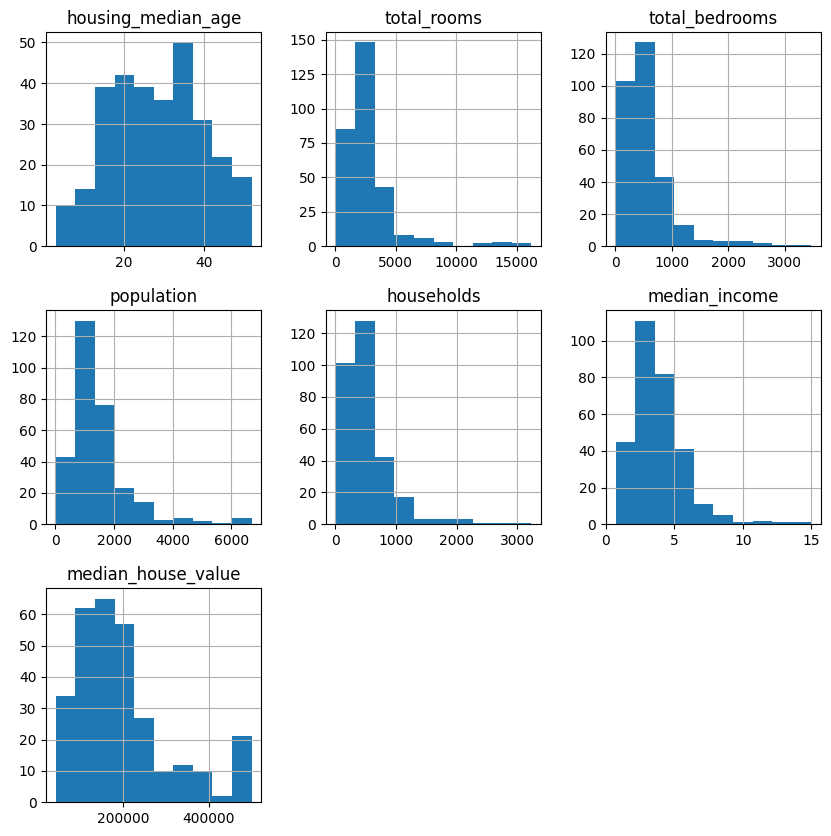

In [8]:
cali_df[cali_df.columns].hist(figsize=(10,10));

In [9]:
cali_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,28.34,11.84,3.00,19.00,29.00,36.25,52.0
total_rooms,300.0,2700.71,2267.50,37.00,1516.00,2149.00,3100.00,16222.0
total_bedrooms,300.0,567.14,445.46,10.00,315.50,447.00,682.50,3474.0
population,300.0,1472.68,1056.08,14.00,838.75,1216.00,1762.25,6700.0
households,300.0,525.15,402.46,7.00,297.75,423.50,620.75,3232.0
median_income,300.0,3.78,1.91,0.71,2.53,3.47,4.66,15.0
median_house_value,300.0,199332.06,114547.80,43900.00,120000.00,171900.00,234425.00,500001.0


## Dendrograms using L2 and L1 form

In [10]:
S_SIZE = 8
M_SIZE = 12
L_SIZE = 16


plt.rc('font', size=S_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=S_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=M_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=S_SIZE)    # legend fontsize
plt.rc('figure', titlesize=L_SIZE)  # fontsize of the figure title

In [26]:
# ward and centroid requires L2
L2_linkage_ward = linkage(cali_df, method='ward', metric='euclidean')
L2_linkage_centroid = linkage(cali_df, method='centroid', metric='euclidean')
L1_linkage_complete = linkage(cali_df, method='complete', metric='cityblock')
L2_linkage_complete = linkage(cali_df, method='complete', metric='euclidean')
L2_linkage_weighted = linkage(cali_df, method='weighted', metric='cityblock')
L1_linkage_weighted = linkage(cali_df, method='weighted', metric='euclidean')

In [18]:
pdist

NameError: name 'pdist' is not defined